In [5]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math

In [6]:
n = np.arange(0,16,1)
x = (0.5)**n

In [7]:
x

array([  1.00000000e+00,   5.00000000e-01,   2.50000000e-01,
         1.25000000e-01,   6.25000000e-02,   3.12500000e-02,
         1.56250000e-02,   7.81250000e-03,   3.90625000e-03,
         1.95312500e-03,   9.76562500e-04,   4.88281250e-04,
         2.44140625e-04,   1.22070312e-04,   6.10351562e-05,
         3.05175781e-05])

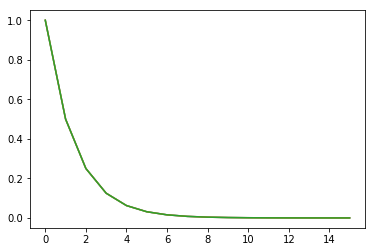

In [9]:
plt.plot(x)
plt.show()

In [10]:
import cmath
def dft(N):
    W = np.ndarray((N,N),dtype = complex)
    for i in range(N):
        for j in range(N):
            W[i][j] = cmath.exp(complex(0,float(-2*math.pi/N*i*j)))
    return W
Y = dft(16)

In [11]:
X = x.transpose()
z = np.matmul(Y,X)

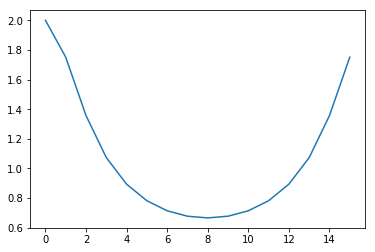

In [12]:
plt.plot(abs(z))
plt.show()

In [13]:
def haarMatrix(n, normalized=True):
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h
A = haarMatrix(16)

In [14]:
b = np.matmul(A,X)

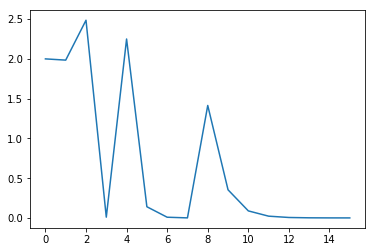

In [15]:
plt.plot(b)
plt.show()

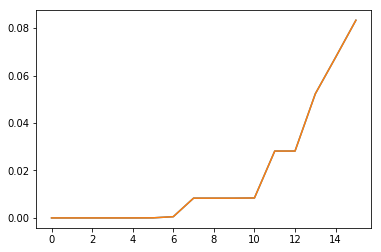

In [17]:
from numpy.linalg import inv
El = []
for L in range(1,17):
    bm = []
    sum = 0
    for i in range(16-L):
        bm.append(b[i])
    for i in range(16-L,16):
        bm.append(0)
    xm = np.matmul(inv(A),bm)
    for i in range(len(X)):
        sum = sum + ((X[i]-xm[i])**2)
        q = sum/16
    El.append(q)
plt.plot(El)
plt.show()

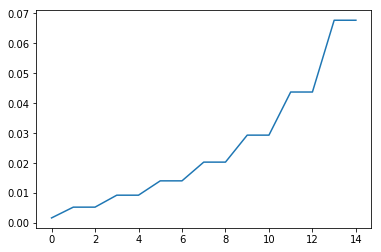

In [18]:
Dl = []
L = np.arange(1,16,1)
for j in range(len(L)):
    zm = []
    sum = 0
    for i in range(math.floor((17-L[j])/2)):
        zm.append(z[i])
    for i in range(math.floor((17-L[j])/2),math.ceil((17+L[j])/2)):
        zm.append(0)
    for i in range(math.ceil((17+L[j])/2),16):
        zm.append(z[i])
    dm = np.matmul(inv(Y),zm)
    for i in range(len(X)):
        sum = sum + ((abs(X[i]-dm[i]))**2)
        q = sum/16
    Dl.append(q)
plt.plot(Dl)
plt.show()

In [19]:
from scipy.fftpack import dct,idct
c = dct(X)

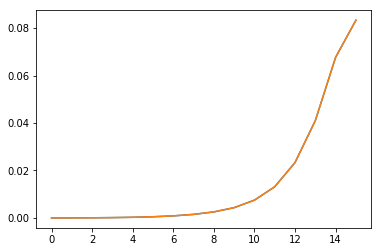

In [21]:
Cl = []
for L in range(1,17):
    cm = []
    sum = 0
    for i in range(16-L):
        cm.append(c[i])
    for i in range(16-L,16):
        cm.append(0)
    xm = idct(cm)/32
    for i in range(len(X)):
        sum = sum + ((X[i]-xm[i])**2)
        q = sum/16
    Cl.append(q)
plt.plot(Cl)
plt.show()

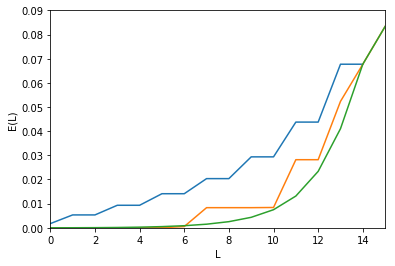

In [23]:
plt.plot(Dl)
plt.plot(El)
plt.plot(Cl)
plt.axis([0, 15, 0, 0.09])
plt.ylabel('E(L)')
plt.xlabel('L')
plt.show()